**pyAF (python Auto-Forecasting): Libreria dedicada al auto-ajuste de modelo para forecasting (series de tiempo)**

Los codigos ejemplos desarrollados tienen como base los codigos ejemplo de las siguientes paginas (y paginas vinculadas):<br>
- https://github.com/antoinecarme/pyaf

# Forecasting metodo 1

In [1]:
# librerias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [20]:
# Crear datos de serie de tiempo

# Generar datos para N dias con fecha de inicio dado
N = 1000
inicio = "2017-01-20"
periodos = 'D'

# Crear datos sinteticos
df = pd.DataFrame({"date" : pd.date_range(start=inicio, periods=N, freq=periodos),
                         "signal" : (np.arange(N)//40 + np.arange(N) % 21 + np.random.randn(N))})
df

,date,signal
0,2017-01-20,-1.151723
1,2017-01-21,0.969683
2,2017-01-22,1.749197
3,2017-01-23,4.279443
4,2017-01-24,2.587512
...,...,...
995,2019-10-12,31.543271
996,2019-10-13,32.951889
997,2019-10-14,34.946676
998,2019-10-15,35.808646


<Figure size 1000x300 with 0 Axes>

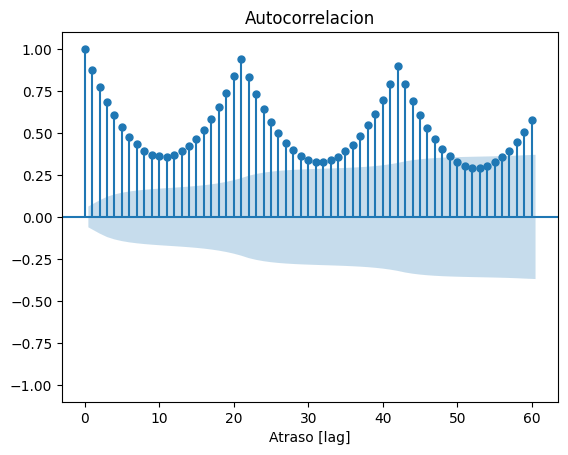

<Figure size 1000x300 with 0 Axes>

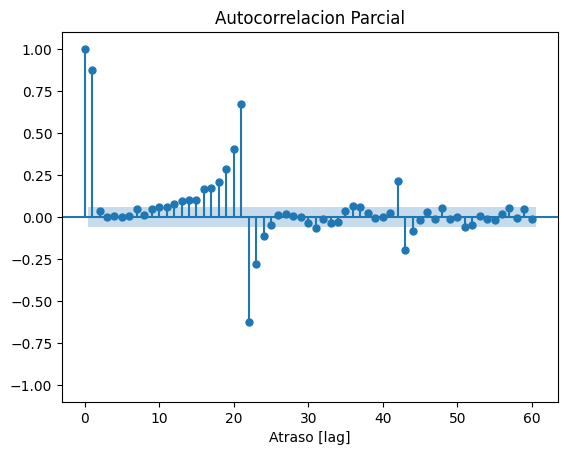

In [21]:
# Visualizar autocorrelaciones

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

n_lags = 60
figx = 10
figy = 3

df1 = df.copy()
df1.index = df1.date
df1 = df1["signal"]

plt.figure(figsize=(figx,figy))
plot_acf(df1,lags=n_lags)
plt.ylim([-1.1,1.1])
plt.title('Autocorrelacion')
plt.xlabel('Atraso [lag]')
plt.show()

plt.figure(figsize=(figx,figy))
plot_pacf(df1,lags=n_lags,method='ywm')
plt.ylim([-1.1,1.1])
plt.title('Autocorrelacion Parcial')
plt.xlabel('Atraso [lag]')
plt.show()

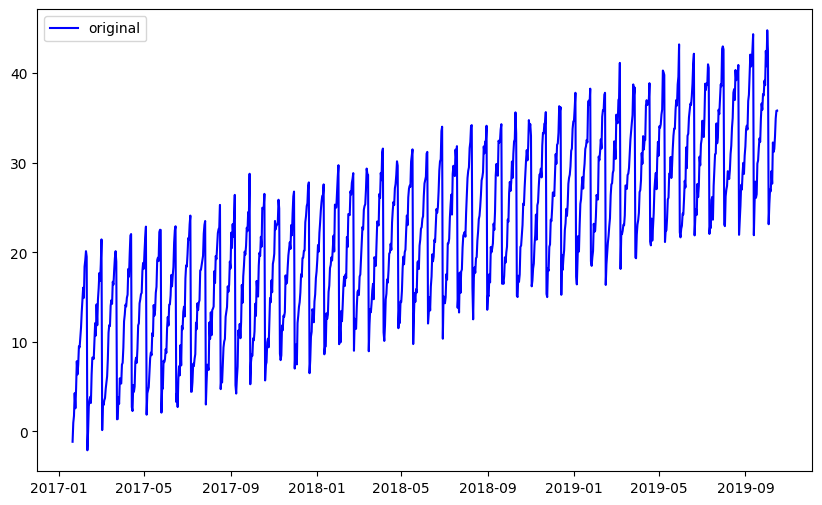

In [22]:
# Visualizar datos
plt.figure(figsize=(10,6))
v1 = df.copy()
plt.plot(v1['date'],v1['signal'],'-b',label='original')
plt.legend()
plt.show()

<AxesSubplot:xlabel='date'>

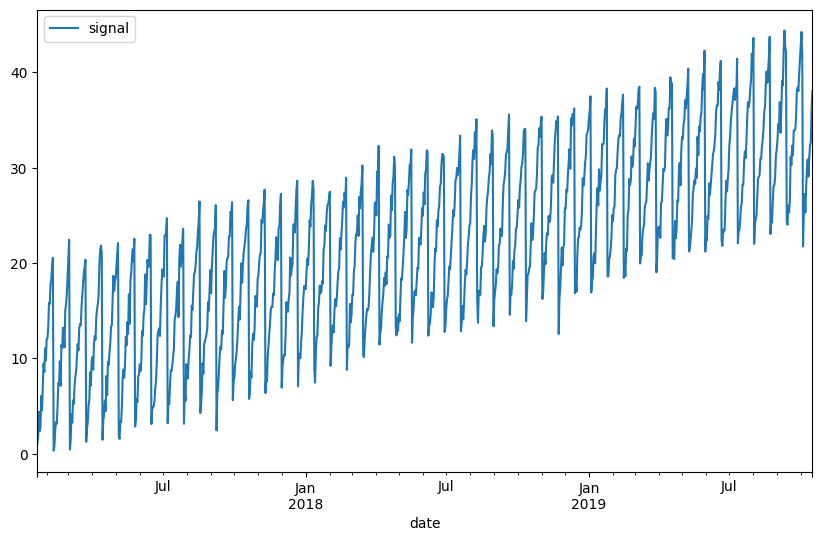

In [5]:
# grafica de pandas
df.plot('date','signal',figsize=(10,6))

In [23]:
# Entrenar modelo

import pyaf.ForecastEngine as autof

# crear motor para deteccion de mejor modelo
aforecast = autof.cForecastEngine()

# Dias futuros de prediccion
dias_predice = 30

# Determinar el mejor modelo - indicar columnas a usar
aforecast.train(iInputDS = df, iTime = 'date', iSignal = 'signal', iHorizon = dias_predice)

# ver resultados
aforecast.getModelInfo()

INFO:pyaf.timing:('OPERATION_START', ('SIGNAL_TRAINING', {'Signals': ['signal'], 'Transformations': [('signal', 'None', '_', 'T+S+R'), ('signal', 'None', 'Diff_', 'T+S+R'), ('signal', 'None', 'RelDiff_', 'T+S+R'), ('signal', 'None', 'CumSum_', 'T+S+R')], 'Cores': 4}))
INFO:pyaf.timing:('OPERATION_END_ELAPSED', 5.566, ('SIGNAL_TRAINING', {'Signals': ['signal'], 'Transformations': [('signal', 'None', '_', 'T+S+R'), ('signal', 'None', 'Diff_', 'T+S+R'), ('signal', 'None', 'RelDiff_', 'T+S+R'), ('signal', 'None', 'CumSum_', 'T+S+R')], 'Cores': 4}))
INFO:pyaf.timing:('OPERATION_START', ('FINALIZE_TRAINING', {'Signals': ['signal'], 'Transformations': [('signal', [('signal', 'None', 'CumSum_', 'T+S+R'), ('signal', 'None', 'Diff_', 'T+S+R'), ('signal', 'None', 'RelDiff_', 'T+S+R'), ('signal', 'None', '_', 'T+S+R')])], 'Cores': 1}))
INFO:pyaf.timing:('OPERATION_START', ('MODEL_SELECTION', {'Signal': 'signal', 'Transformations': [('signal', 'None', 'CumSum_', 'T+S+R'), ('signal', 'None', 'Diff_'

In [24]:
# Prediccion

dias_predice_k = dias_predice
print('Prediccion de K puntos:',dias_predice_k)

dforecast = aforecast.forecast(iInputDS=df, iHorizon=dias_predice_k)
dforecast

INFO:pyaf.timing:('OPERATION_START', ('FORECASTING', {'Signals': ['signal'], 'Horizon': 30}))


Prediccion de K puntos: 30


INFO:pyaf.timing:('OPERATION_END_ELAPSED', 0.212, ('FORECASTING', {'Signals': ['signal'], 'Horizon': 30}))


,date,signal,row_number,date_Normalized,_signal,_signal_ConstantTrend,_signal_ConstantTrend_residue,_signal_ConstantTrend_residue_zeroCycle[0.0],_signal_ConstantTrend_residue_zeroCycle[0.0]_residue,_signal_ConstantTrend_residue_zeroCycle[0.0]_residue_AR(64),...,signal_Forecast_Quantile_36,signal_Forecast_Quantile_43,signal_Forecast_Quantile_50,signal_Forecast_Quantile_57,signal_Forecast_Quantile_64,signal_Forecast_Quantile_71,signal_Forecast_Quantile_78,signal_Forecast_Quantile_85,signal_Forecast_Quantile_92,signal_Forecast_Quantile_99
0,2017-01-20,-1.151723,0,0.000000,0.020242,0.453797,-0.433555,0.0,-0.433555,-0.394964,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-01-21,0.969683,1,0.001290,0.065479,0.453797,-0.388318,0.0,-0.388318,-0.394964,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-01-22,1.749197,2,0.002581,0.082101,0.453797,-0.371696,0.0,-0.371696,-0.384126,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-01-23,4.279443,3,0.003871,0.136055,0.453797,-0.317742,0.0,-0.317742,-0.373723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-01-24,2.587512,4,0.005161,0.099977,0.453797,-0.353820,0.0,-0.353820,-0.353615,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,2019-11-11,NaN,1025,1.322581,NaN,0.453797,NaN,0.0,NaN,0.426133,...,26.433651,29.749940,32.742738,37.459723,40.134053,44.380898,46.953262,49.999102,52.566392,61.349956
1026,2019-11-12,NaN,1026,1.323871,NaN,0.453797,NaN,0.0,NaN,0.428694,...,23.549817,29.142356,32.540229,38.373183,41.818418,45.988544,49.705584,53.060337,58.198083,70.027103
1027,2019-11-13,NaN,1027,1.325161,NaN,0.453797,NaN,0.0,NaN,0.466108,...,22.316829,29.266294,34.724342,41.029590,45.781910,51.684552,56.079674,59.521407,68.656090,89.772164
1028,2019-11-14,NaN,1028,1.326452,NaN,0.453797,NaN,0.0,NaN,0.437266,...,15.031393,26.583860,32.848553,42.307353,49.633325,55.592230,60.872099,65.866386,80.057068,107.341119


In [25]:
# Ver valores de prediccion (solo primeros valores)
dforecast[['date','signal_Forecast']].tail(dias_predice_k).values[:5]

array([[Timestamp('2019-10-17 00:00:00'), 37.13271122941591],
       [Timestamp('2019-10-18 00:00:00'), 37.45635792765257],
       [Timestamp('2019-10-19 00:00:00'), 38.340744184371246],
       [Timestamp('2019-10-20 00:00:00'), 39.793525710988206],
       [Timestamp('2019-10-21 00:00:00'), 40.2115860835604]], dtype=object)

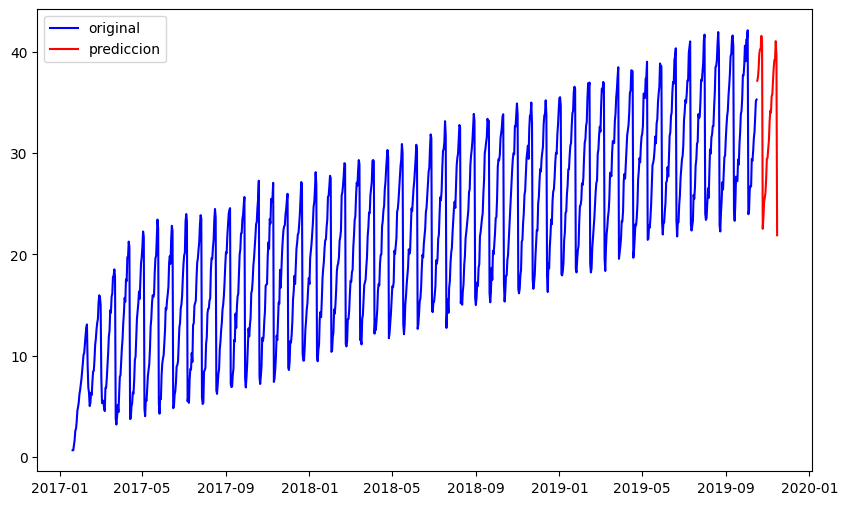

In [26]:
# Visualizar prediccion
plt.figure(figsize=(10,6))
v1 = dforecast.iloc[:-dias_predice_k,:].copy()
v2 = dforecast.iloc[-dias_predice_k:,:].copy()
plt.plot(v1['date'],v1['signal_Forecast'],'-b',label='original')
plt.plot(v2['date'],v2['signal_Forecast'],'-r',label='prediccion')
plt.legend()
plt.show()

Observamos que los valores predichos son acordes a la tendencia y la estacionalidad

In [27]:
# Modelo a diccionario
aforecast.to_dict()

{'signal': {'Dataset': {'Time': {'TimeVariable': 'date',
    'TimeMinMax': ['2017-01-20 00:00:00', '2019-10-16 00:00:00'],
    'Horizon': 30},
   'Signal': 'signal',
   'Training_Signal_Length': 1000},
  'Model': {'Best_Decomposition': '_signal_ConstantTrend_residue_zeroCycle[0.0]_residue_AR(64)',
   'Signal_Decomposition_Type': 'T+S+R',
   'Signal_Transoformation': 'NoTransf',
   'Trend': 'ConstantTrend',
   'Cycle': 'NoCycle',
   'AR_Model': 'AR'},
  'Model_Performance': {'MAPE': 0.0411,
   'MASE': 0.5249,
   'CRPS': 1.6885,
   'MAE': 1.2598,
   'RMSE': 1.5875,
   'MedAE': 1.0295,
   'LnQ': 0.5451,
   'COMPLEXITY': 64.0}}}

## Modelo simple

In [ ]:
# Crear datos de serie de tiempo

# Generar datos para N dias con fecha de inicio dado
N = 1000
inicio = "2017-01-20"
periodos = 'D'

# Crear datos sinteticos
df = pd.DataFrame({"date" : pd.date_range(start=inicio, periods=N, freq=periodos),
                         "signal" : (np.arange(N)//40 + np.arange(N) % 21 + np.random.randn(N))})
df

In [ ]:
# grafica de pandas
df.plot('date','signal',figsize=(10,6))

In [ ]:
# Entrenar modelo

import pyaf.ForecastEngine as autof

# crear motor para deteccion de mejor modelo
aforecast = autof.cForecastEngine()

# Dias futuros de prediccion
dias_predice = 30

# Determinar el mejor modelo - indicar columnas a usar
aforecast.train(iInputDS = df, iTime = 'date', iSignal = 'signal', iHorizon = dias_predice)

# ver resultados
aforecast.getModelInfo()

In [ ]:
# Modelo a diccionario
aforecast.to_dict()

In [45]:
# Ver mejores modelos entrenados
aforecast.mSignalDecomposition.mTrPerfDetails.head()

,Split,Transformation,DecompositionType,Model,DetailedFormula,Category,Complexity,FitMAPE,ForecastMAPE,TestMAPE
0,None,_signal,T+S+R,_signal_LinearTrend_residue_Seasonal_DayOfWeek...,"(_signal, T+S+R, None, _signal_LinearTrend_res...",NoTransf_LinearTrend_Seasonal_DayOfWeek_AR,72.0,44.6281,0.0365,0.0305
1,None,_signal,T+S+R,_signal_LinearTrend_residue_bestCycle_byMAPE_r...,"(_signal, T+S+R, None, _signal_LinearTrend_res...",NoTransf_LinearTrend_Cycle_None_AR,65.0,67.3061,0.0375,0.0317
2,None,_signal,T+S+R,_signal_LinearTrend_residue_zeroCycle[0.0]_res...,"(_signal, T+S+R, None, _signal_LinearTrend_res...",NoTransf_LinearTrend_NoCycle_AR,65.0,67.3061,0.0375,0.0317
3,None,_signal,T+S+R,_signal_LinearTrend_residue_Seasonal_DayOfNthW...,"(_signal, T+S+R, None, _signal_LinearTrend_res...",NoTransf_LinearTrend_Seasonal_DayOfNthWeekOfMo...,114.0,41.0511,0.0388,0.0385
4,None,_signal,T+S+R,_signal_PolyTrend_residue_Seasonal_DayOfWeek_r...,"(_signal, T+S+R, None, _signal_PolyTrend_resid...",NoTransf_PolyTrend_Seasonal_DayOfWeek_AR,74.0,44.5892,0.0391,0.0349


In [52]:
# Ver el modelo seleccionado
aforecast.to_dict()['signal']["Model"]

{'Best_Decomposition': '_signal_ConstantTrend_residue_zeroCycle[0.0]_residue_AR(64)',
 'Signal_Decomposition_Type': 'T+S+R',
 'Signal_Transoformation': 'NoTransf',
 'Trend': 'ConstantTrend',
 'Cycle': 'NoCycle',
 'AR_Model': 'AR'}

In [53]:
# Rendimiento del modelo seleccionado
aforecast.to_dict()['signal']["Model_Performance"]

{'MAPE': 0.0411,
 'MASE': 0.5249,
 'CRPS': 1.6885,
 'MAE': 1.2598,
 'RMSE': 1.5875,
 'MedAE': 1.0295,
 'LnQ': 0.5451,
 'COMPLEXITY': 64.0}

In [57]:
# Complejidad del modelo - relacionado al orden del mismo
orden_lag = aforecast.to_dict()['signal']["Model_Performance"]["COMPLEXITY"]
orden_lag

64.0

INFO:pyaf.timing:('OPERATION_START', ('FORECASTING', {'Signals': ['signal'], 'Horizon': 50}))


Prediccion de puntos: 50


INFO:pyaf.timing:('OPERATION_END_ELAPSED', 0.301, ('FORECASTING', {'Signals': ['signal'], 'Horizon': 50}))


 *** Resultados en el horizonte (Test) *** 
Forecast MAE : 1.406


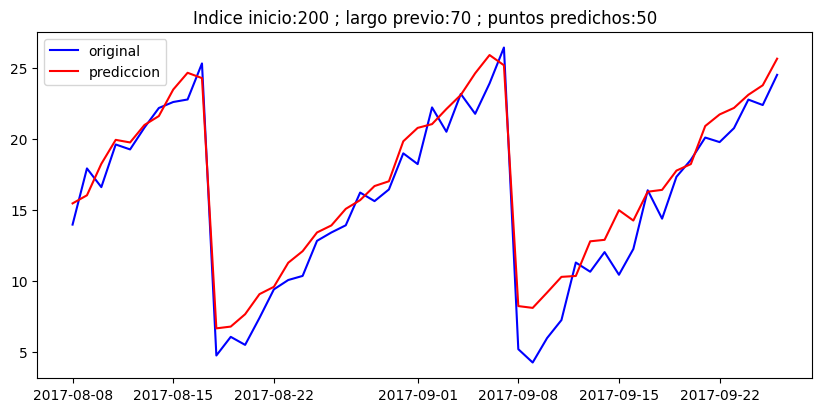

In [64]:
# Prediccion con datos seleccionados, visualización y calculo de KPI de rendimiento

# Indice de inicio
indice_inicio = 200

# Largo de datos input previos -  NOTA: Este valor debe ser grande para evitar falle
largo_previo = 70

# Cantidad de puntos a predecir
puntos_predice = 50

#######################################

# Calcular
print('Prediccion de puntos:',puntos_predice)

# Separar datos input - test
datos_previo = df.iloc[indice_inicio-largo_previo:indice_inicio].copy()
datos_post =  df.iloc[indice_inicio:indice_inicio+puntos_predice].copy()

# Prediccion
pred_df = aforecast.forecast(iInputDS=datos_previo, iHorizon=puntos_predice)

#######################################

# Seleccion de datos
v1 = datos_post.copy()  # valores test
v2 = pred_df.iloc[-puntos_predice:].copy() # prediccion

######################################
# Evaluar el rendimiento del modelo

# MAE: Valor de error absoluto promedio
def mae(y_hat, y_true):
    return np.mean(np.abs(y_hat-y_true))

# MAPE: Valor de error porcentual absoluto promedio
def mape(y_hat, y_true):
    return np.mean(np.abs(100.*(y_hat-y_true)/(y_true + 1e-5)))

print(' *** Resultados en el horizonte (Test) *** ')
print('Forecast MAE : %0.3f' % mae(v1["signal"].values, v2["signal_Forecast"].values))


## Visualiza
plt.figure(figsize=(10,4.5))
plt.plot(v1['date'],v1['signal'],'-b',label='original')
plt.plot(v2['date'],v2['signal_Forecast'],'-r',label='prediccion')
plt.title('Indice inicio:' + str(indice_inicio) + ' ; largo previo:' + str(largo_previo) + ' ; puntos predichos:' + str(puntos_predice))
plt.legend()
plt.show()

## Modelo con datos de niveles de Ozono

In [37]:
# Leer datos de repositorio github para medidas de Ozono

ozone_csv = "https://raw.githubusercontent.com/antoinecarme/pyaf/master/data/ozone_exogenous_encoded.csv"
ozone = pd.read_csv(ozone_csv)
ozone['Date'] = ozone['Date'].astype(np.datetime64);
ozone

,Unnamed: 0,row_number,Date,Date_Normalized,RelDiff_Ozone,Ozone,RelDiff_Ozone_ConstantTrend_residue,RelDiff_Ozone_ConstantTrend_residue_zeroCycle,RelDiff_Ozone_ConstantTrend_residue_zeroCycle_residue,RelDiff_Ozone_ConstantTrend_residue_bestCycle_byL2,...,Exog3,Exog4=E,Exog4=F,Exog4=C,Exog4=D,Exog4=B,Exog5=K,Exog5=L,Exog5=M,Exog5=N
0,0,0,1955-01-01,0.000000,0.000000,2.7,-0.007256,0.0,-0.007256,-0.045453,...,-0.400168,0,1,0,0,0,0,0,1,0
1,1,1,1955-02-01,0.006288,-0.077778,2.0,-0.085034,0.0,-0.085034,0.023766,...,0.891463,0,0,0,0,0,0,1,0,0
2,2,2,1955-03-01,0.011968,0.192771,3.6,0.185515,0.0,0.185515,0.067544,...,1.537278,0,0,0,0,0,0,1,0,0
3,3,3,1955-04-01,0.018256,0.141414,5.0,0.134158,0.0,0.134158,0.056095,...,1.537278,0,1,0,0,0,0,0,1,0
4,4,4,1955-05-01,0.024341,0.132743,6.5,0.125487,0.0,0.125487,0.010036,...,0.891463,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,211,211,1972-08-01,1.302637,-0.019417,3.8,-0.026674,0.0,-0.026674,-0.010897,...,-1.045983,0,0,0,0,1,1,0,0,0
212,212,212,1972-09-01,1.308925,-0.069307,3.1,-0.076563,0.0,-0.076563,0.003336,...,-1.691798,0,0,0,0,1,1,0,0,0
213,213,213,1972-10-01,1.315010,-0.106383,2.1,-0.113639,0.0,-0.113639,-0.031629,...,-1.691798,0,0,0,0,0,1,0,0,0
214,214,214,1972-11-01,1.321298,-0.059524,1.6,-0.066780,0.0,-0.066780,-0.119235,...,-2.337613,0,0,0,0,0,1,0,0,0


<Figure size 1000x300 with 0 Axes>

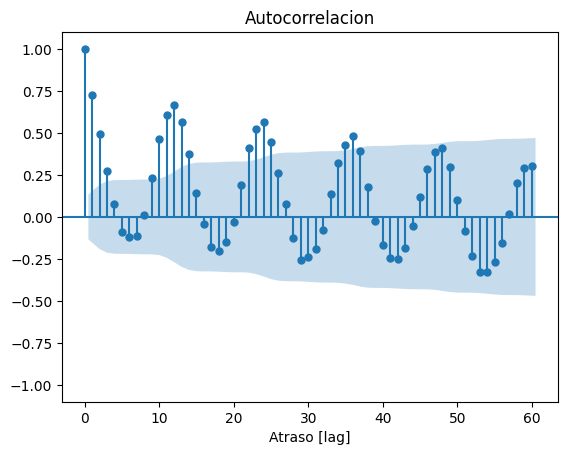

<Figure size 1000x300 with 0 Axes>

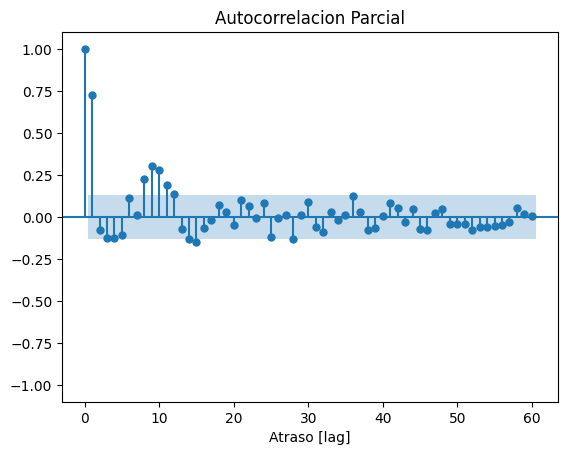

In [38]:
# Visualizar autocorrelaciones

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

n_lags = 60
figx = 10
figy = 3

df1 = ozone.copy()
df1.index = df1.Date
df1 = df1["Ozone"]

plt.figure(figsize=(figx,figy))
plot_acf(df1,lags=n_lags)
plt.ylim([-1.1,1.1])
plt.title('Autocorrelacion')
plt.xlabel('Atraso [lag]')
plt.show()

plt.figure(figsize=(figx,figy))
plot_pacf(df1,lags=n_lags,method='ywm')
plt.ylim([-1.1,1.1])
plt.title('Autocorrelacion Parcial')
plt.xlabel('Atraso [lag]')
plt.show()

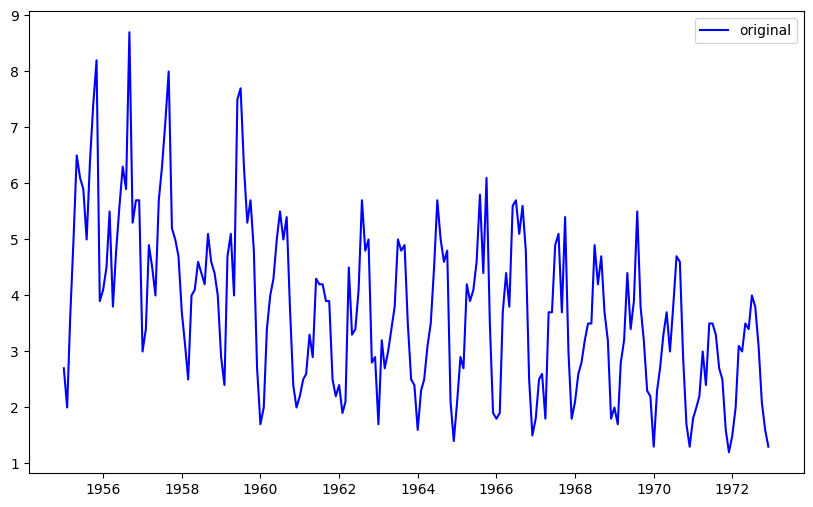

In [39]:
# Visualizar datos
plt.figure(figsize=(10,6))
v1 = ozone.copy()
plt.plot(v1['Date'],v1['Ozone'],'-b',label='original')
plt.legend()
plt.show()

<AxesSubplot:xlabel='Date'>

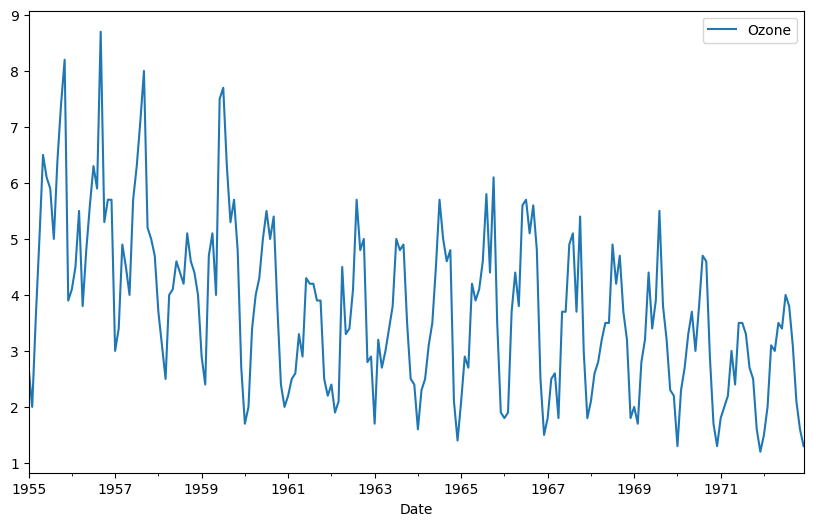

In [40]:
# grafica de pandas
ozone.plot('Date','Ozone',figsize=(10,6))

In [41]:
# Entrenar modelo

import pyaf.ForecastEngine as autof

# crear motor para deteccion de mejor modelo
aforecast = autof.cForecastEngine()

# Dias futuros de prediccion
dias_predice = 20

# Determinar el mejor modelo - indicar columnas a usar
aforecast.train(iInputDS = ozone, iTime = 'Date', iSignal = 'Ozone', iHorizon = dias_predice)

# ver resultados
aforecast.getModelInfo()

INFO:pyaf.timing:('OPERATION_START', ('SIGNAL_TRAINING', {'Signals': ['Ozone'], 'Transformations': [('Ozone', 'None', '_', 'T+S+R'), ('Ozone', 'None', 'Diff_', 'T+S+R'), ('Ozone', 'None', 'RelDiff_', 'T+S+R'), ('Ozone', 'None', 'CumSum_', 'T+S+R')], 'Cores': 4}))
INFO:pyaf.timing:('OPERATION_END_ELAPSED', 4.546, ('SIGNAL_TRAINING', {'Signals': ['Ozone'], 'Transformations': [('Ozone', 'None', '_', 'T+S+R'), ('Ozone', 'None', 'Diff_', 'T+S+R'), ('Ozone', 'None', 'RelDiff_', 'T+S+R'), ('Ozone', 'None', 'CumSum_', 'T+S+R')], 'Cores': 4}))
INFO:pyaf.timing:('OPERATION_START', ('FINALIZE_TRAINING', {'Signals': ['Ozone'], 'Transformations': [('Ozone', [('Ozone', 'None', 'CumSum_', 'T+S+R'), ('Ozone', 'None', 'Diff_', 'T+S+R'), ('Ozone', 'None', 'RelDiff_', 'T+S+R'), ('Ozone', 'None', '_', 'T+S+R')])], 'Cores': 1}))
INFO:pyaf.timing:('OPERATION_START', ('MODEL_SELECTION', {'Signal': 'Ozone', 'Transformations': [('Ozone', 'None', 'CumSum_', 'T+S+R'), ('Ozone', 'None', 'Diff_', 'T+S+R'), ('Ozone

In [42]:
# Prediccion

dias_predice_k = dias_predice
print('Prediccion de K puntos:',dias_predice_k)

dforecast = aforecast.forecast(iInputDS=ozone, iHorizon=dias_predice_k)
dforecast

INFO:pyaf.timing:('OPERATION_START', ('FORECASTING', {'Signals': ['Ozone'], 'Horizon': 20}))
INFO:pyaf.timing:('OPERATION_END_ELAPSED', 0.153, ('FORECASTING', {'Signals': ['Ozone'], 'Horizon': 20}))


Prediccion de K puntos: 20


,Date,Ozone,row_number,Date_Normalized,_Ozone,_Ozone_LinearTrend,_Ozone_LinearTrend_residue,_Ozone_LinearTrend_residue_zeroCycle[0.0],_Ozone_LinearTrend_residue_zeroCycle[0.0]_residue,_Ozone_LinearTrend_residue_zeroCycle[0.0]_residue_AR(54),...,Ozone_Residue,Ozone_Forecast_Lower_Bound,Ozone_Forecast_Upper_Bound,Ozone_Forecast_Quantile_2,Ozone_Forecast_Quantile_18,Ozone_Forecast_Quantile_34,Ozone_Forecast_Quantile_50,Ozone_Forecast_Quantile_66,Ozone_Forecast_Quantile_82,Ozone_Forecast_Quantile_98
0,1955-01-01,2.7,0,0.000000,0.200000,0.508445,-0.308445,0.0,-0.308445,-0.083392,...,-1.687903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1955-02-01,2.0,1,0.006572,0.106667,0.506837,-0.400170,0.0,-0.400170,-0.083392,...,-2.375838,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1955-03-01,3.6,2,0.012508,0.320000,0.505384,-0.185384,0.0,-0.185384,-0.109954,...,-0.565721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1955-04-01,5.0,3,0.019080,0.506667,0.503775,0.002892,0.0,0.002892,-0.054076,...,0.427259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1955-05-01,6.5,4,0.025440,0.706667,0.502218,0.204448,0.0,0.204448,0.015250,...,1.418984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,1974-04-01,NaN,231,1.490354,NaN,0.143645,NaN,0.0,NaN,0.017942,...,NaN,-0.287799,5.111609,-0.455800,0.756818,1.728709,2.247736,3.094029,3.495401,4.144644
232,1974-05-01,NaN,232,1.496714,NaN,0.142089,NaN,0.0,NaN,0.079727,...,NaN,0.264264,5.462968,0.051109,1.310142,2.130802,2.835047,3.503023,3.875119,4.507562
233,1974-06-01,NaN,233,1.503286,NaN,0.140480,NaN,0.0,NaN,0.112936,...,NaN,0.599853,5.601381,0.353714,1.665995,2.412201,3.115937,3.665887,4.103821,4.665620
234,1974-07-01,NaN,234,1.509646,NaN,0.138923,NaN,0.0,NaN,0.129773,...,NaN,0.792076,5.638372,0.522818,1.867689,2.540635,3.216407,3.732809,4.180618,4.725735


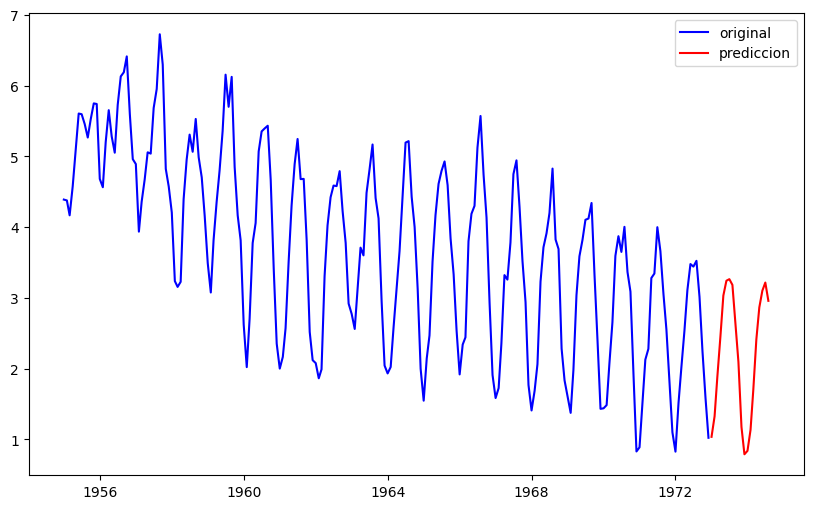

In [43]:
# Visualizar prediccion
plt.figure(figsize=(10,6))
v1 = dforecast.iloc[:-dias_predice_k,:].copy()
v2 = dforecast.iloc[-dias_predice_k:,:].copy()
plt.plot(v1['Date'],v1['Ozone_Forecast'],'-b',label='original')
plt.plot(v2['Date'],v2['Ozone_Forecast'],'-r',label='prediccion')
plt.legend()
plt.show()

Observamos que mediante el modelo auto-ajustado se obtienen predicciones acordes a la tendencia y la estacionalidad

## Ejemplo prediccion con Ozone - Personalizado

In [117]:
# Leer datos de repositorio github para medidas de Ozono

ozone_csv = "https://raw.githubusercontent.com/antoinecarme/pyaf/master/data/ozone_exogenous_encoded.csv"
df = pd.read_csv(ozone_csv)
df['Date'] = df['Date'].astype(np.datetime64);
df

,Unnamed: 0,row_number,Date,Date_Normalized,RelDiff_Ozone,Ozone,RelDiff_Ozone_ConstantTrend_residue,RelDiff_Ozone_ConstantTrend_residue_zeroCycle,RelDiff_Ozone_ConstantTrend_residue_zeroCycle_residue,RelDiff_Ozone_ConstantTrend_residue_bestCycle_byL2,...,Exog3,Exog4=E,Exog4=F,Exog4=C,Exog4=D,Exog4=B,Exog5=K,Exog5=L,Exog5=M,Exog5=N
0,0,0,1955-01-01,0.000000,0.000000,2.7,-0.007256,0.0,-0.007256,-0.045453,...,-0.400168,0,1,0,0,0,0,0,1,0
1,1,1,1955-02-01,0.006288,-0.077778,2.0,-0.085034,0.0,-0.085034,0.023766,...,0.891463,0,0,0,0,0,0,1,0,0
2,2,2,1955-03-01,0.011968,0.192771,3.6,0.185515,0.0,0.185515,0.067544,...,1.537278,0,0,0,0,0,0,1,0,0
3,3,3,1955-04-01,0.018256,0.141414,5.0,0.134158,0.0,0.134158,0.056095,...,1.537278,0,1,0,0,0,0,0,1,0
4,4,4,1955-05-01,0.024341,0.132743,6.5,0.125487,0.0,0.125487,0.010036,...,0.891463,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,211,211,1972-08-01,1.302637,-0.019417,3.8,-0.026674,0.0,-0.026674,-0.010897,...,-1.045983,0,0,0,0,1,1,0,0,0
212,212,212,1972-09-01,1.308925,-0.069307,3.1,-0.076563,0.0,-0.076563,0.003336,...,-1.691798,0,0,0,0,1,1,0,0,0
213,213,213,1972-10-01,1.315010,-0.106383,2.1,-0.113639,0.0,-0.113639,-0.031629,...,-1.691798,0,0,0,0,0,1,0,0,0
214,214,214,1972-11-01,1.321298,-0.059524,1.6,-0.066780,0.0,-0.066780,-0.119235,...,-2.337613,0,0,0,0,0,1,0,0,0


In [118]:
# Entrenar modelo

import pyaf.ForecastEngine as autof

# crear motor para deteccion de mejor modelo
aforecast = autof.cForecastEngine()

# Puntos de prediccion
puntos_predice = 20

variable_predice = "Ozone"
variable_fecha = "Date"

# Determinar el mejor modelo - indicar columnas a usar
aforecast.train(iInputDS = df, iTime = variable_fecha, iSignal = variable_predice, iHorizon = puntos_predice)

# ver resultados
aforecast.getModelInfo()

INFO:pyaf.timing:('OPERATION_START', ('SIGNAL_TRAINING', {'Signals': ['Ozone'], 'Transformations': [('Ozone', 'None', '_', 'T+S+R'), ('Ozone', 'None', 'Diff_', 'T+S+R'), ('Ozone', 'None', 'RelDiff_', 'T+S+R'), ('Ozone', 'None', 'CumSum_', 'T+S+R')], 'Cores': 4}))
INFO:pyaf.timing:('OPERATION_END_ELAPSED', 4.352, ('SIGNAL_TRAINING', {'Signals': ['Ozone'], 'Transformations': [('Ozone', 'None', '_', 'T+S+R'), ('Ozone', 'None', 'Diff_', 'T+S+R'), ('Ozone', 'None', 'RelDiff_', 'T+S+R'), ('Ozone', 'None', 'CumSum_', 'T+S+R')], 'Cores': 4}))
INFO:pyaf.timing:('OPERATION_START', ('FINALIZE_TRAINING', {'Signals': ['Ozone'], 'Transformations': [('Ozone', [('Ozone', 'None', 'CumSum_', 'T+S+R'), ('Ozone', 'None', 'Diff_', 'T+S+R'), ('Ozone', 'None', 'RelDiff_', 'T+S+R'), ('Ozone', 'None', '_', 'T+S+R')])], 'Cores': 1}))
INFO:pyaf.timing:('OPERATION_START', ('MODEL_SELECTION', {'Signal': 'Ozone', 'Transformations': [('Ozone', 'None', 'CumSum_', 'T+S+R'), ('Ozone', 'None', 'Diff_', 'T+S+R'), ('Ozone

In [119]:
# Modelo a diccionario
aforecast.to_dict()

{'Ozone': {'Dataset': {'Time': {'TimeVariable': 'Date',
    'TimeMinMax': ['1955-01-01 00:00:00', '1972-12-01 00:00:00'],
    'Horizon': 20},
   'Signal': 'Ozone',
   'Training_Signal_Length': 216},
  'Model': {'Best_Decomposition': '_Ozone_LinearTrend_residue_zeroCycle[0.0]_residue_AR(54)',
   'Signal_Decomposition_Type': 'T+S+R',
   'Signal_Transoformation': 'NoTransf',
   'Trend': 'LinearTrend',
   'Cycle': 'NoCycle',
   'AR_Model': 'AR'},
  'Model_Performance': {'MAPE': 0.1767,
   'MASE': 0.734,
   'CRPS': 0.2944,
   'MAE': 0.5138,
   'RMSE': 0.6209,
   'MedAE': 0.5057,
   'LnQ': 2.6054,
   'COMPLEXITY': 40.0}}}

In [120]:
# Ver mejores modelos entrenados
aforecast.mSignalDecomposition.mTrPerfDetails.head()

,Split,Transformation,DecompositionType,Model,DetailedFormula,Category,Complexity,FitMAPE,ForecastMAPE,TestMAPE
0,None,_Ozone,T+S+R,_Ozone_PolyTrend_residue_bestCycle_byMAPE_resi...,"(_Ozone, T+S+R, None, _Ozone_PolyTrend_residue...",NoTransf_PolyTrend_Cycle_None_AR,42.0,0.1684,0.1668,0.3568
1,None,_Ozone,T+S+R,_Ozone_PolyTrend_residue_zeroCycle[0.0]_residu...,"(_Ozone, T+S+R, None, _Ozone_PolyTrend_residue...",NoTransf_PolyTrend_NoCycle_AR,42.0,0.1684,0.1668,0.3568
2,None,_Ozone,T+S+R,_Ozone_ConstantTrend_residue_Seasonal_MonthOfY...,"(_Ozone, T+S+R, None, _Ozone_ConstantTrend_res...",NoTransf_ConstantTrend_Seasonal_MonthOfYear_AR,51.0,0.1664,0.1726,0.2505
3,None,_Ozone,T+S+R,_Ozone_LinearTrend_residue_zeroCycle[0.0]_resi...,"(_Ozone, T+S+R, None, _Ozone_LinearTrend_resid...",NoTransf_LinearTrend_NoCycle_AR,40.0,0.1695,0.1767,0.1449
4,None,_Ozone,T+S+R,_Ozone_LinearTrend_residue_bestCycle_byMAPE_re...,"(_Ozone, T+S+R, None, _Ozone_LinearTrend_resid...",NoTransf_LinearTrend_Cycle_5_AR,45.0,0.1731,0.1777,0.1578


In [121]:
# Ver el modelo seleccionado
aforecast.to_dict()[variable_predice]["Model"]

{'Best_Decomposition': '_Ozone_LinearTrend_residue_zeroCycle[0.0]_residue_AR(54)',
 'Signal_Decomposition_Type': 'T+S+R',
 'Signal_Transoformation': 'NoTransf',
 'Trend': 'LinearTrend',
 'Cycle': 'NoCycle',
 'AR_Model': 'AR'}

In [122]:
# Rendimiento del modelo seleccionado
aforecast.to_dict()[variable_predice]["Model_Performance"]

{'MAPE': 0.1767,
 'MASE': 0.734,
 'CRPS': 0.2944,
 'MAE': 0.5138,
 'RMSE': 0.6209,
 'MedAE': 0.5057,
 'LnQ': 2.6054,
 'COMPLEXITY': 40.0}

In [123]:
# Complejidad del modelo - relacionado al orden del mismo
orden_lag = int(aforecast.to_dict()[variable_predice]["Model_Performance"]["COMPLEXITY"])
orden_lag

40

INFO:pyaf.timing:('OPERATION_START', ('FORECASTING', {'Signals': ['Ozone'], 'Horizon': 20}))
INFO:pyaf.timing:('OPERATION_END_ELAPSED', 0.13, ('FORECASTING', {'Signals': ['Ozone'], 'Horizon': 20}))


Prediccion de puntos: 20
 *** Resultados en el horizonte (Test) *** 
Forecast MAE : 0.613


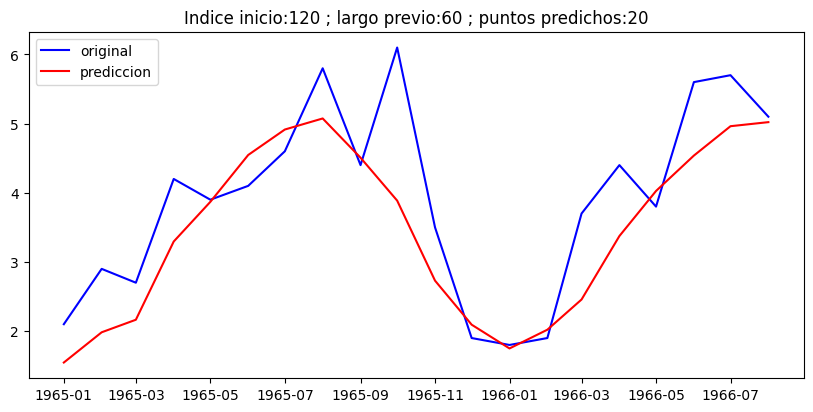

In [128]:
# Prediccion con datos seleccionados, visualización y calculo de KPI de rendimiento

# Indice de inicio
indice_inicio = 120

# Largo de datos input previos - NOTA: Este valor debe ser grande para evitar falle
largo_previo = 60

# Cantidad de puntos a predecir
puntos_predice = 20

#######################################

# Calcular
print('Prediccion de puntos:',puntos_predice)

# Separar datos input - test
datos_previo = df.iloc[indice_inicio-largo_previo:indice_inicio,].copy()
datos_post =  df.iloc[indice_inicio:indice_inicio+puntos_predice,].copy()

# Prediccion
pred_df = aforecast.forecast(iInputDS=datos_previo,iHorizon=puntos_predice)

#######################################

# Seleccion de datos
v1 = datos_post.copy()  # valores test
v2 = pred_df.iloc[-puntos_predice:].copy() # prediccion

######################################
# Evaluar el rendimiento del modelo

# MAE: Valor de error absoluto promedio
def mae(y_hat, y_true):
    return np.mean(np.abs(y_hat-y_true))

# MAPE: Valor de error porcentual absoluto promedio
def mape(y_hat, y_true):
    return np.mean(np.abs(100.*(y_hat-y_true)/(y_true + 1e-5)))

print(' *** Resultados en el horizonte (Test) *** ')
print('Forecast MAE : %0.3f' % mae(v1[variable_predice].values, v2[variable_predice + "_Forecast"].values))


## Visualiza
plt.figure(figsize=(10,4.5))
plt.plot(v1[variable_fecha],v1[variable_predice],'-b',label='original')
plt.plot(v2[variable_fecha],v2[variable_predice + '_Forecast'],'-r',label='prediccion')
plt.title('Indice inicio:' + str(indice_inicio) + ' ; largo previo:' + str(largo_previo) + ' ; puntos predichos:' + str(puntos_predice))
plt.legend()
plt.show()

# Forecasting metodo 2 - Con datos Train/Test

In [44]:
# Leer datos de repositorio github para medidas de Ozono

ozone_csv = "https://raw.githubusercontent.com/antoinecarme/pyaf/master/data/ozone_exogenous_encoded.csv"
ozone = pd.read_csv(ozone_csv)
ozone['Date'] = ozone['Date'].astype(np.datetime64);

# Dar forma a los datos para solo seleccionar la fecha y la señal con el valor (Ozono)
ozone["date"] = ozone["Date"]
ozone["signal"] = ozone["Ozone"]

# Extraer informacion deseada en un nuevo dataframe
df = ozone[["date","signal"]].copy()
df

,date,signal
0,1955-01-01,2.7
1,1955-02-01,2.0
2,1955-03-01,3.6
3,1955-04-01,5.0
4,1955-05-01,6.5
...,...,...
211,1972-08-01,3.8
212,1972-09-01,3.1
213,1972-10-01,2.1
214,1972-11-01,1.6


In [45]:
# Crear datos de Train-Test

puntos_test = 20
train_df = df.iloc[:-puntos_test,:].copy()
test_df = df.iloc[-puntos_test:,:].copy()

train_df.shape, test_df.shape

((196, 2), (20, 2))

In [46]:
# Entrenar modelo con Train

import pyaf.ForecastEngine as autof

# crear motor para deteccion de mejor modelo
aforecast = autof.cForecastEngine()

# Dias futuros de prediccion
dias_predice = puntos_test

# Determinar el mejor modelo - indicar columnas a usar
aforecast.train(iInputDS = train_df, iTime = 'date', iSignal = 'signal', iHorizon = dias_predice)

# ver resultados
aforecast.getModelInfo()

INFO:pyaf.timing:('OPERATION_START', ('SIGNAL_TRAINING', {'Signals': ['signal'], 'Transformations': [('signal', 'None', '_', 'T+S+R'), ('signal', 'None', 'Diff_', 'T+S+R'), ('signal', 'None', 'RelDiff_', 'T+S+R'), ('signal', 'None', 'CumSum_', 'T+S+R')], 'Cores': 4}))
INFO:pyaf.timing:('OPERATION_END_ELAPSED', 5.149, ('SIGNAL_TRAINING', {'Signals': ['signal'], 'Transformations': [('signal', 'None', '_', 'T+S+R'), ('signal', 'None', 'Diff_', 'T+S+R'), ('signal', 'None', 'RelDiff_', 'T+S+R'), ('signal', 'None', 'CumSum_', 'T+S+R')], 'Cores': 4}))
INFO:pyaf.timing:('OPERATION_START', ('FINALIZE_TRAINING', {'Signals': ['signal'], 'Transformations': [('signal', [('signal', 'None', 'CumSum_', 'T+S+R'), ('signal', 'None', 'Diff_', 'T+S+R'), ('signal', 'None', 'RelDiff_', 'T+S+R'), ('signal', 'None', '_', 'T+S+R')])], 'Cores': 1}))
INFO:pyaf.timing:('OPERATION_START', ('MODEL_SELECTION', {'Signal': 'signal', 'Transformations': [('signal', 'None', 'CumSum_', 'T+S+R'), ('signal', 'None', 'Diff_'

In [47]:
# Prediccion

pred_df = aforecast.forecast(iInputDS=train_df, iHorizon=dias_predice)

# Extraer los valores de forecasting, ya que devuelve train_df concatenado a la prediccion al final de la tabla
pred_df = pred_df.tail(dias_predice)
pred_df.head()

INFO:pyaf.timing:('OPERATION_START', ('FORECASTING', {'Signals': ['signal'], 'Horizon': 20}))
INFO:pyaf.timing:('OPERATION_END_ELAPSED', 0.16, ('FORECASTING', {'Signals': ['signal'], 'Horizon': 20}))


,date,signal,row_number,date_Normalized,Diff_signal,Diff_signal_LinearTrend,Diff_signal_LinearTrend_residue,Diff_signal_LinearTrend_residue_bestCycle_byMAPE,Diff_signal_LinearTrend_residue_bestCycle_byMAPE_residue,Diff_signal_LinearTrend_residue_bestCycle_byMAPE_residue_AR(49),...,signal_Residue,signal_Forecast_Lower_Bound,signal_Forecast_Upper_Bound,signal_Forecast_Quantile_2,signal_Forecast_Quantile_18,signal_Forecast_Quantile_34,signal_Forecast_Quantile_50,signal_Forecast_Quantile_66,signal_Forecast_Quantile_82,signal_Forecast_Quantile_98
196,1971-05-01,NaN,196,1.409929,NaN,-0.000314,NaN,0,NaN,0.082533,...,NaN,1.984045,4.622597,1.907515,2.723061,3.015786,3.307195,3.496610,3.838385,4.532380
197,1971-06-01,NaN,197,1.417258,NaN,-0.000336,NaN,0,NaN,0.073250,...,NaN,2.331339,5.354443,2.094090,3.232585,3.572289,3.933645,4.057992,4.441996,5.226822
198,1971-07-01,NaN,198,1.424350,NaN,-0.000356,NaN,0,NaN,0.072789,...,NaN,2.858723,5.899075,2.566421,3.832502,4.144121,4.400716,4.621168,4.985835,5.799955
199,1971-08-01,NaN,199,1.431678,NaN,-0.000377,NaN,0,NaN,-0.042084,...,NaN,2.546077,5.583293,2.296673,3.484528,3.834555,4.133852,4.337713,4.624443,5.348444
200,1971-09-01,NaN,200,1.439007,NaN,-0.000398,NaN,0,NaN,-0.065768,...,NaN,1.948447,5.201655,1.614154,2.906462,3.455551,3.667118,3.936366,4.203053,4.858660


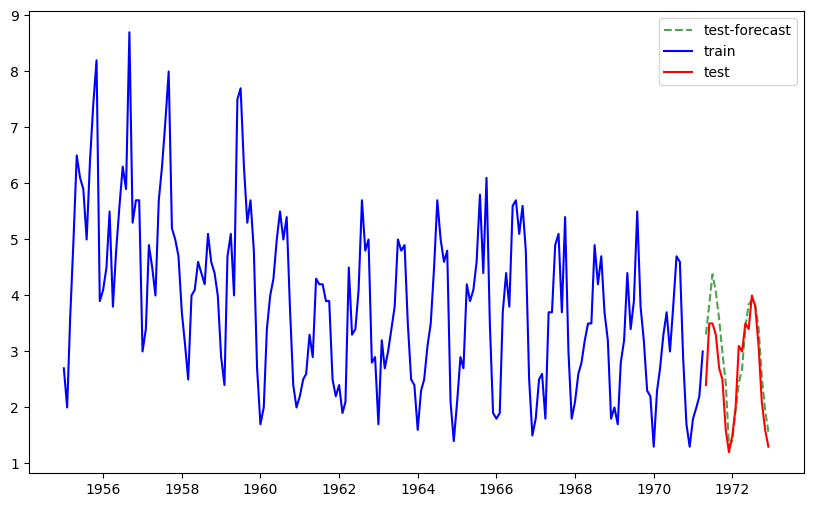

In [48]:
# Visualizar prediccion

plt.figure(figsize=(10,6))
v1 = train_df.copy()
v2 = test_df.copy()
v3 = pred_df.copy()
plt.plot(v3['date'],v3['signal_Forecast'],'--g',label='test-forecast',alpha=0.7)
plt.plot(v1['date'],v1['signal'],'-b',label='train')
plt.plot(v2['date'],v2['signal'],'-r',label='test')
plt.legend()
plt.show()

In [49]:
# Evaluar el rendimiento del modelo

# MAE: Valor de error absoluto promedio
def mae(y_hat, y_true):
    return np.mean(np.abs(y_hat-y_true))

# MAPE: Valor de error porcentual absoluto promedio
def mape(y_hat, y_true):
    return np.mean(np.abs(100.*(y_hat-y_true)/(y_true + 1e-5)))

print(' *** Resultados en el horizonte (Test) *** ')
print('Forecast MAE : %0.3f' % mae(v3["signal_Forecast"].values, v2["signal"].values))
print('--------------------')
print('Forecast MAPE : %0.3f' % mape(v3["signal_Forecast"].values, v2["signal"].values),'%')

 *** Resultados en el horizonte (Test) *** 
Forecast MAE : 0.418
--------------------
Forecast MAPE : 17.168 %


Se observa que al usar Train/Test y evaluar el rendimiento del modelo con datos no vistos, el apego es relativamente bueno, evidenciado en el MAPE/MAE.

# Forecasting metodo 3 - Con falta de datos en Train

**Ajuste de modelo con datos faltantes en Train**

INFO:pyaf.timing:('OPERATION_START', ('SIGNAL_TRAINING', {'Signals': ['signal'], 'Transformations': [('signal', 'None', '_', 'T+S+R'), ('signal', 'None', 'Diff_', 'T+S+R'), ('signal', 'None', 'RelDiff_', 'T+S+R'), ('signal', 'None', 'CumSum_', 'T+S+R')], 'Cores': 4}))




------------------------------
Cantidad puntos remueve:  0
------------------------------


INFO:pyaf.timing:('OPERATION_END_ELAPSED', 4.707, ('SIGNAL_TRAINING', {'Signals': ['signal'], 'Transformations': [('signal', 'None', '_', 'T+S+R'), ('signal', 'None', 'Diff_', 'T+S+R'), ('signal', 'None', 'RelDiff_', 'T+S+R'), ('signal', 'None', 'CumSum_', 'T+S+R')], 'Cores': 4}))
INFO:pyaf.timing:('OPERATION_START', ('FINALIZE_TRAINING', {'Signals': ['signal'], 'Transformations': [('signal', [('signal', 'None', 'CumSum_', 'T+S+R'), ('signal', 'None', 'Diff_', 'T+S+R'), ('signal', 'None', 'RelDiff_', 'T+S+R'), ('signal', 'None', '_', 'T+S+R')])], 'Cores': 1}))
INFO:pyaf.timing:('OPERATION_START', ('MODEL_SELECTION', {'Signal': 'signal', 'Transformations': [('signal', 'None', 'CumSum_', 'T+S+R'), ('signal', 'None', 'Diff_', 'T+S+R'), ('signal', 'None', 'RelDiff_', 'T+S+R'), ('signal', 'None', '_', 'T+S+R')]}))
INFO:pyaf.timing:('OPERATION_END_ELAPSED', 0.004, ('MODEL_SELECTION', {'Signal': 'signal', 'Transformations': [('signal', 'None', 'CumSum_', 'T+S+R'), ('signal', 'None', 'Diff_', 

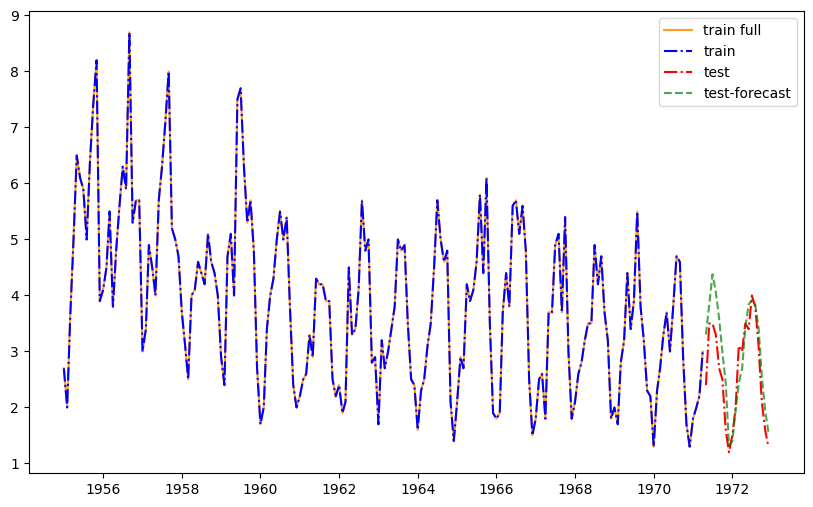

INFO:pyaf.timing:('OPERATION_START', ('SIGNAL_TRAINING', {'Signals': ['signal'], 'Transformations': [('signal', 'None', '_', 'T+S+R'), ('signal', 'None', 'Diff_', 'T+S+R'), ('signal', 'None', 'RelDiff_', 'T+S+R'), ('signal', 'None', 'CumSum_', 'T+S+R')], 'Cores': 4}))


 *** Resultados en el horizonte (Test) *** 
Forecast MAE : 0.418
Forecast MAPE : 17.168 %


------------------------------
Cantidad puntos remueve:  5
------------------------------


INFO:pyaf.timing:('OPERATION_END_ELAPSED', 4.84, ('SIGNAL_TRAINING', {'Signals': ['signal'], 'Transformations': [('signal', 'None', '_', 'T+S+R'), ('signal', 'None', 'Diff_', 'T+S+R'), ('signal', 'None', 'RelDiff_', 'T+S+R'), ('signal', 'None', 'CumSum_', 'T+S+R')], 'Cores': 4}))
INFO:pyaf.timing:('OPERATION_START', ('FINALIZE_TRAINING', {'Signals': ['signal'], 'Transformations': [('signal', [('signal', 'None', 'CumSum_', 'T+S+R'), ('signal', 'None', 'Diff_', 'T+S+R'), ('signal', 'None', 'RelDiff_', 'T+S+R'), ('signal', 'None', '_', 'T+S+R')])], 'Cores': 1}))
INFO:pyaf.timing:('OPERATION_START', ('MODEL_SELECTION', {'Signal': 'signal', 'Transformations': [('signal', 'None', 'CumSum_', 'T+S+R'), ('signal', 'None', 'Diff_', 'T+S+R'), ('signal', 'None', 'RelDiff_', 'T+S+R'), ('signal', 'None', '_', 'T+S+R')]}))
INFO:pyaf.timing:('OPERATION_END_ELAPSED', 0.004, ('MODEL_SELECTION', {'Signal': 'signal', 'Transformations': [('signal', 'None', 'CumSum_', 'T+S+R'), ('signal', 'None', 'Diff_', '

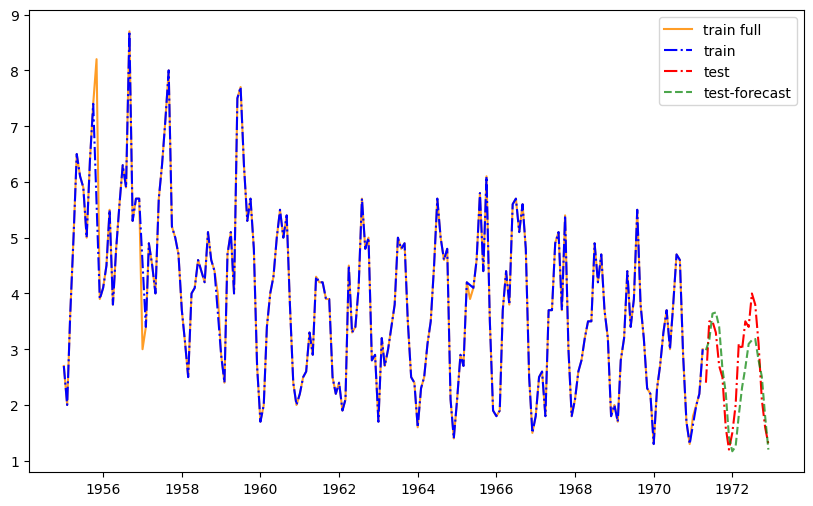

INFO:pyaf.timing:('OPERATION_START', ('SIGNAL_TRAINING', {'Signals': ['signal'], 'Transformations': [('signal', 'None', '_', 'T+S+R'), ('signal', 'None', 'Diff_', 'T+S+R'), ('signal', 'None', 'RelDiff_', 'T+S+R'), ('signal', 'None', 'CumSum_', 'T+S+R')], 'Cores': 4}))


 *** Resultados en el horizonte (Test) *** 
Forecast MAE : 0.488
Forecast MAPE : 19.060 %


------------------------------
Cantidad puntos remueve:  10
------------------------------


INFO:pyaf.timing:('OPERATION_END_ELAPSED', 5.207, ('SIGNAL_TRAINING', {'Signals': ['signal'], 'Transformations': [('signal', 'None', '_', 'T+S+R'), ('signal', 'None', 'Diff_', 'T+S+R'), ('signal', 'None', 'RelDiff_', 'T+S+R'), ('signal', 'None', 'CumSum_', 'T+S+R')], 'Cores': 4}))
INFO:pyaf.timing:('OPERATION_START', ('FINALIZE_TRAINING', {'Signals': ['signal'], 'Transformations': [('signal', [('signal', 'None', 'CumSum_', 'T+S+R'), ('signal', 'None', 'Diff_', 'T+S+R'), ('signal', 'None', 'RelDiff_', 'T+S+R'), ('signal', 'None', '_', 'T+S+R')])], 'Cores': 1}))
INFO:pyaf.timing:('OPERATION_START', ('MODEL_SELECTION', {'Signal': 'signal', 'Transformations': [('signal', 'None', 'CumSum_', 'T+S+R'), ('signal', 'None', 'Diff_', 'T+S+R'), ('signal', 'None', 'RelDiff_', 'T+S+R'), ('signal', 'None', '_', 'T+S+R')]}))
INFO:pyaf.timing:('OPERATION_END_ELAPSED', 0.004, ('MODEL_SELECTION', {'Signal': 'signal', 'Transformations': [('signal', 'None', 'CumSum_', 'T+S+R'), ('signal', 'None', 'Diff_', 

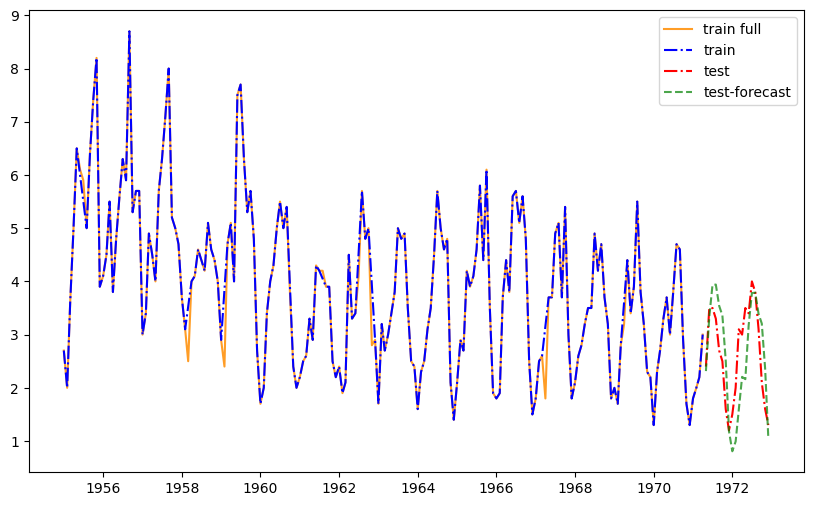

INFO:pyaf.timing:('OPERATION_START', ('SIGNAL_TRAINING', {'Signals': ['signal'], 'Transformations': [('signal', 'None', '_', 'T+S+R'), ('signal', 'None', 'Diff_', 'T+S+R'), ('signal', 'None', 'RelDiff_', 'T+S+R'), ('signal', 'None', 'CumSum_', 'T+S+R')], 'Cores': 4}))


 *** Resultados en el horizonte (Test) *** 
Forecast MAE : 0.609
Forecast MAPE : 25.793 %


------------------------------
Cantidad puntos remueve:  15
------------------------------


INFO:pyaf.timing:('OPERATION_END_ELAPSED', 4.609, ('SIGNAL_TRAINING', {'Signals': ['signal'], 'Transformations': [('signal', 'None', '_', 'T+S+R'), ('signal', 'None', 'Diff_', 'T+S+R'), ('signal', 'None', 'RelDiff_', 'T+S+R'), ('signal', 'None', 'CumSum_', 'T+S+R')], 'Cores': 4}))
INFO:pyaf.timing:('OPERATION_START', ('FINALIZE_TRAINING', {'Signals': ['signal'], 'Transformations': [('signal', [('signal', 'None', 'CumSum_', 'T+S+R'), ('signal', 'None', 'Diff_', 'T+S+R'), ('signal', 'None', 'RelDiff_', 'T+S+R'), ('signal', 'None', '_', 'T+S+R')])], 'Cores': 1}))
INFO:pyaf.timing:('OPERATION_START', ('MODEL_SELECTION', {'Signal': 'signal', 'Transformations': [('signal', 'None', 'CumSum_', 'T+S+R'), ('signal', 'None', 'Diff_', 'T+S+R'), ('signal', 'None', 'RelDiff_', 'T+S+R'), ('signal', 'None', '_', 'T+S+R')]}))
INFO:pyaf.timing:('OPERATION_END_ELAPSED', 0.004, ('MODEL_SELECTION', {'Signal': 'signal', 'Transformations': [('signal', 'None', 'CumSum_', 'T+S+R'), ('signal', 'None', 'Diff_', 

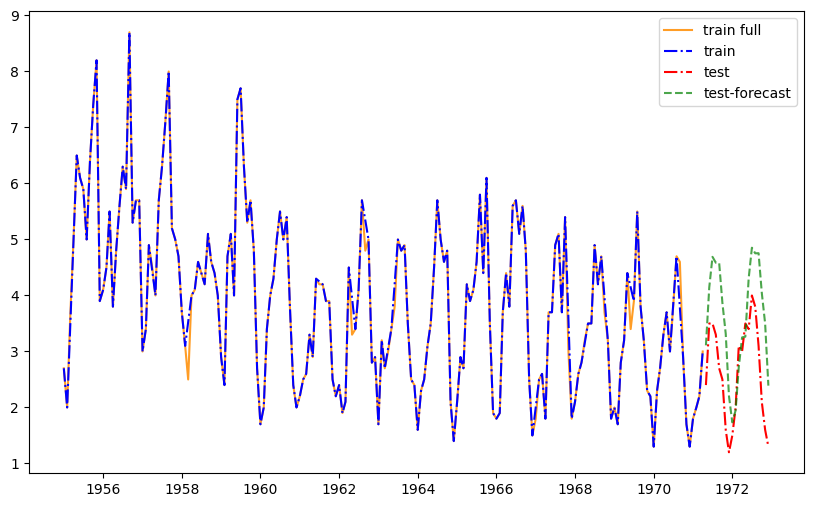

INFO:pyaf.timing:('OPERATION_START', ('SIGNAL_TRAINING', {'Signals': ['signal'], 'Transformations': [('signal', 'None', '_', 'T+S+R'), ('signal', 'None', 'Diff_', 'T+S+R'), ('signal', 'None', 'RelDiff_', 'T+S+R'), ('signal', 'None', 'CumSum_', 'T+S+R')], 'Cores': 4}))


 *** Resultados en el horizonte (Test) *** 
Forecast MAE : 1.013
Forecast MAPE : 45.162 %


------------------------------
Cantidad puntos remueve:  20
------------------------------


INFO:pyaf.timing:('OPERATION_END_ELAPSED', 4.565, ('SIGNAL_TRAINING', {'Signals': ['signal'], 'Transformations': [('signal', 'None', '_', 'T+S+R'), ('signal', 'None', 'Diff_', 'T+S+R'), ('signal', 'None', 'RelDiff_', 'T+S+R'), ('signal', 'None', 'CumSum_', 'T+S+R')], 'Cores': 4}))
INFO:pyaf.timing:('OPERATION_START', ('FINALIZE_TRAINING', {'Signals': ['signal'], 'Transformations': [('signal', [('signal', 'None', 'CumSum_', 'T+S+R'), ('signal', 'None', 'Diff_', 'T+S+R'), ('signal', 'None', 'RelDiff_', 'T+S+R'), ('signal', 'None', '_', 'T+S+R')])], 'Cores': 1}))
INFO:pyaf.timing:('OPERATION_START', ('MODEL_SELECTION', {'Signal': 'signal', 'Transformations': [('signal', 'None', 'CumSum_', 'T+S+R'), ('signal', 'None', 'Diff_', 'T+S+R'), ('signal', 'None', 'RelDiff_', 'T+S+R'), ('signal', 'None', '_', 'T+S+R')]}))
INFO:pyaf.timing:('OPERATION_END_ELAPSED', 0.004, ('MODEL_SELECTION', {'Signal': 'signal', 'Transformations': [('signal', 'None', 'CumSum_', 'T+S+R'), ('signal', 'None', 'Diff_', 

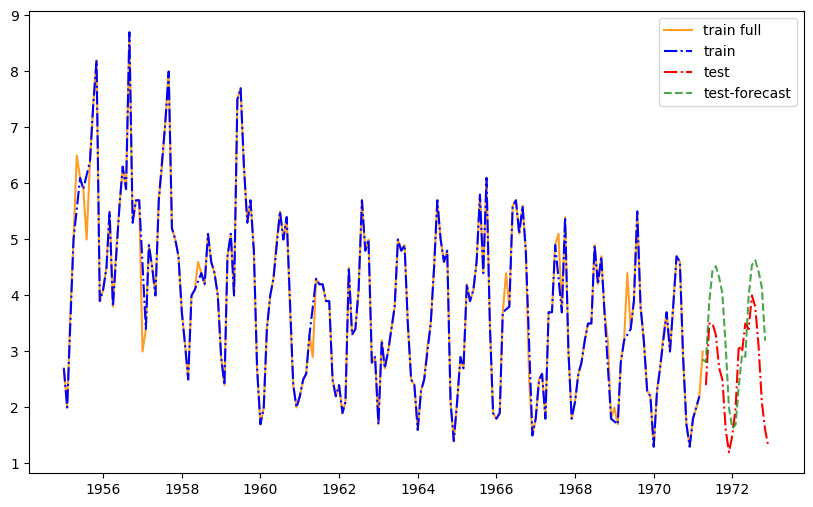

INFO:pyaf.timing:('OPERATION_START', ('SIGNAL_TRAINING', {'Signals': ['signal'], 'Transformations': [('signal', 'None', '_', 'T+S+R'), ('signal', 'None', 'Diff_', 'T+S+R'), ('signal', 'None', 'RelDiff_', 'T+S+R'), ('signal', 'None', 'CumSum_', 'T+S+R')], 'Cores': 4}))


 *** Resultados en el horizonte (Test) *** 
Forecast MAE : 1.181
Forecast MAPE : 58.293 %


------------------------------
Cantidad puntos remueve:  25
------------------------------


INFO:pyaf.timing:('OPERATION_END_ELAPSED', 4.529, ('SIGNAL_TRAINING', {'Signals': ['signal'], 'Transformations': [('signal', 'None', '_', 'T+S+R'), ('signal', 'None', 'Diff_', 'T+S+R'), ('signal', 'None', 'RelDiff_', 'T+S+R'), ('signal', 'None', 'CumSum_', 'T+S+R')], 'Cores': 4}))
INFO:pyaf.timing:('OPERATION_START', ('FINALIZE_TRAINING', {'Signals': ['signal'], 'Transformations': [('signal', [('signal', 'None', 'CumSum_', 'T+S+R'), ('signal', 'None', 'Diff_', 'T+S+R'), ('signal', 'None', 'RelDiff_', 'T+S+R'), ('signal', 'None', '_', 'T+S+R')])], 'Cores': 1}))
INFO:pyaf.timing:('OPERATION_START', ('MODEL_SELECTION', {'Signal': 'signal', 'Transformations': [('signal', 'None', 'CumSum_', 'T+S+R'), ('signal', 'None', 'Diff_', 'T+S+R'), ('signal', 'None', 'RelDiff_', 'T+S+R'), ('signal', 'None', '_', 'T+S+R')]}))
INFO:pyaf.timing:('OPERATION_END_ELAPSED', 0.004, ('MODEL_SELECTION', {'Signal': 'signal', 'Transformations': [('signal', 'None', 'CumSum_', 'T+S+R'), ('signal', 'None', 'Diff_', 

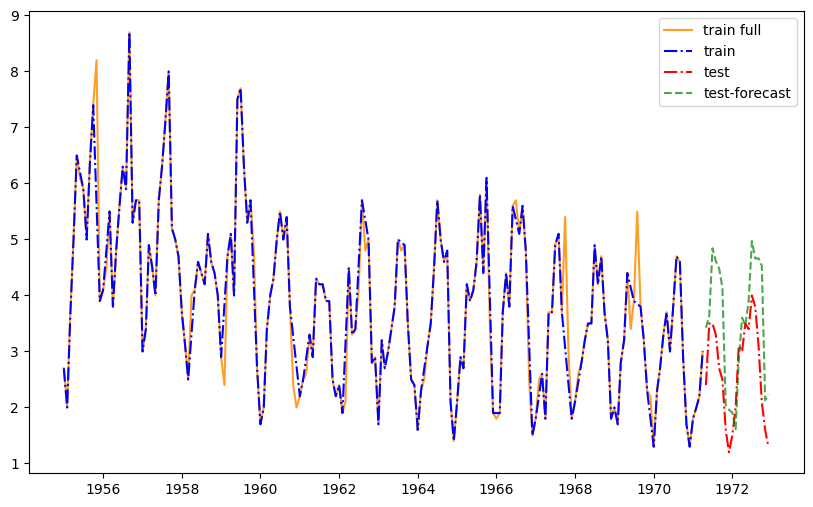

INFO:pyaf.timing:('OPERATION_START', ('SIGNAL_TRAINING', {'Signals': ['signal'], 'Transformations': [('signal', 'None', '_', 'T+S+R'), ('signal', 'None', 'Diff_', 'T+S+R'), ('signal', 'None', 'RelDiff_', 'T+S+R'), ('signal', 'None', 'CumSum_', 'T+S+R')], 'Cores': 4}))


 *** Resultados en el horizonte (Test) *** 
Forecast MAE : 0.897
Forecast MAPE : 37.826 %


------------------------------
Cantidad puntos remueve:  30
------------------------------


INFO:pyaf.timing:('OPERATION_END_ELAPSED', 4.739, ('SIGNAL_TRAINING', {'Signals': ['signal'], 'Transformations': [('signal', 'None', '_', 'T+S+R'), ('signal', 'None', 'Diff_', 'T+S+R'), ('signal', 'None', 'RelDiff_', 'T+S+R'), ('signal', 'None', 'CumSum_', 'T+S+R')], 'Cores': 4}))
INFO:pyaf.timing:('OPERATION_START', ('FINALIZE_TRAINING', {'Signals': ['signal'], 'Transformations': [('signal', [('signal', 'None', 'CumSum_', 'T+S+R'), ('signal', 'None', 'Diff_', 'T+S+R'), ('signal', 'None', 'RelDiff_', 'T+S+R'), ('signal', 'None', '_', 'T+S+R')])], 'Cores': 1}))
INFO:pyaf.timing:('OPERATION_START', ('MODEL_SELECTION', {'Signal': 'signal', 'Transformations': [('signal', 'None', 'CumSum_', 'T+S+R'), ('signal', 'None', 'Diff_', 'T+S+R'), ('signal', 'None', 'RelDiff_', 'T+S+R'), ('signal', 'None', '_', 'T+S+R')]}))
INFO:pyaf.timing:('OPERATION_END_ELAPSED', 0.004, ('MODEL_SELECTION', {'Signal': 'signal', 'Transformations': [('signal', 'None', 'CumSum_', 'T+S+R'), ('signal', 'None', 'Diff_', 

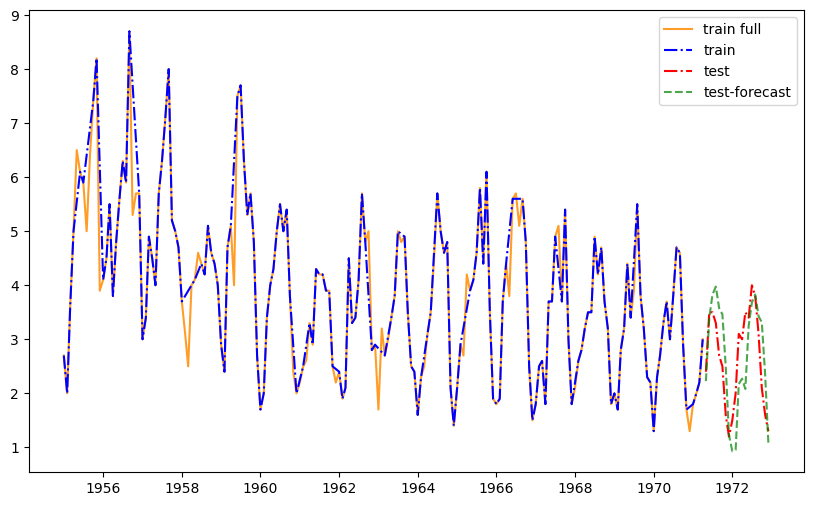

INFO:pyaf.timing:('OPERATION_START', ('SIGNAL_TRAINING', {'Signals': ['signal'], 'Transformations': [('signal', 'None', '_', 'T+S+R'), ('signal', 'None', 'Diff_', 'T+S+R'), ('signal', 'None', 'RelDiff_', 'T+S+R'), ('signal', 'None', 'CumSum_', 'T+S+R')], 'Cores': 4}))


 *** Resultados en el horizonte (Test) *** 
Forecast MAE : 0.587
Forecast MAPE : 24.973 %


------------------------------
Cantidad puntos remueve:  35
------------------------------


INFO:pyaf.timing:('OPERATION_END_ELAPSED', 4.973, ('SIGNAL_TRAINING', {'Signals': ['signal'], 'Transformations': [('signal', 'None', '_', 'T+S+R'), ('signal', 'None', 'Diff_', 'T+S+R'), ('signal', 'None', 'RelDiff_', 'T+S+R'), ('signal', 'None', 'CumSum_', 'T+S+R')], 'Cores': 4}))
INFO:pyaf.timing:('OPERATION_START', ('FINALIZE_TRAINING', {'Signals': ['signal'], 'Transformations': [('signal', [('signal', 'None', 'CumSum_', 'T+S+R'), ('signal', 'None', 'Diff_', 'T+S+R'), ('signal', 'None', 'RelDiff_', 'T+S+R'), ('signal', 'None', '_', 'T+S+R')])], 'Cores': 1}))
INFO:pyaf.timing:('OPERATION_START', ('MODEL_SELECTION', {'Signal': 'signal', 'Transformations': [('signal', 'None', 'CumSum_', 'T+S+R'), ('signal', 'None', 'Diff_', 'T+S+R'), ('signal', 'None', 'RelDiff_', 'T+S+R'), ('signal', 'None', '_', 'T+S+R')]}))
INFO:pyaf.timing:('OPERATION_END_ELAPSED', 0.005, ('MODEL_SELECTION', {'Signal': 'signal', 'Transformations': [('signal', 'None', 'CumSum_', 'T+S+R'), ('signal', 'None', 'Diff_', 

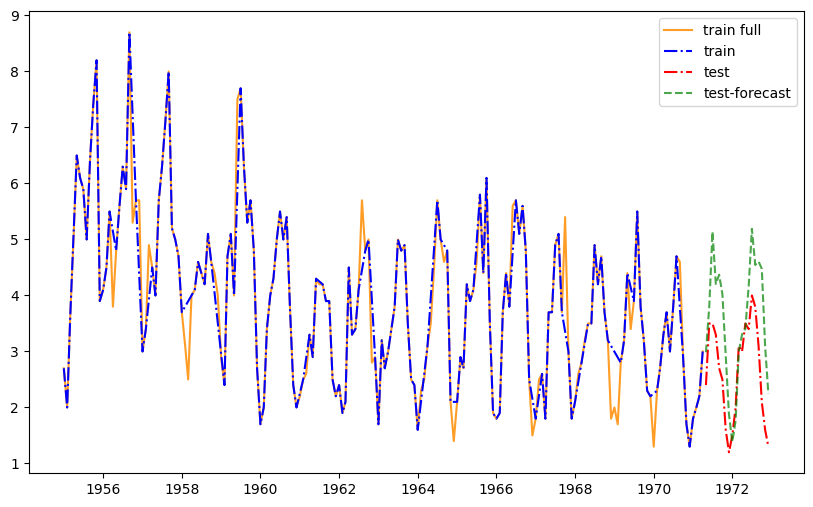

INFO:pyaf.timing:('OPERATION_START', ('SIGNAL_TRAINING', {'Signals': ['signal'], 'Transformations': [('signal', 'None', '_', 'T+S+R'), ('signal', 'None', 'Diff_', 'T+S+R'), ('signal', 'None', 'RelDiff_', 'T+S+R'), ('signal', 'None', 'CumSum_', 'T+S+R')], 'Cores': 4}))


 *** Resultados en el horizonte (Test) *** 
Forecast MAE : 0.924
Forecast MAPE : 40.181 %


------------------------------
Cantidad puntos remueve:  40
------------------------------


INFO:pyaf.timing:('OPERATION_END_ELAPSED', 5.213, ('SIGNAL_TRAINING', {'Signals': ['signal'], 'Transformations': [('signal', 'None', '_', 'T+S+R'), ('signal', 'None', 'Diff_', 'T+S+R'), ('signal', 'None', 'RelDiff_', 'T+S+R'), ('signal', 'None', 'CumSum_', 'T+S+R')], 'Cores': 4}))
INFO:pyaf.timing:('OPERATION_START', ('FINALIZE_TRAINING', {'Signals': ['signal'], 'Transformations': [('signal', [('signal', 'None', 'CumSum_', 'T+S+R'), ('signal', 'None', 'Diff_', 'T+S+R'), ('signal', 'None', 'RelDiff_', 'T+S+R'), ('signal', 'None', '_', 'T+S+R')])], 'Cores': 1}))
INFO:pyaf.timing:('OPERATION_START', ('MODEL_SELECTION', {'Signal': 'signal', 'Transformations': [('signal', 'None', 'CumSum_', 'T+S+R'), ('signal', 'None', 'Diff_', 'T+S+R'), ('signal', 'None', 'RelDiff_', 'T+S+R'), ('signal', 'None', '_', 'T+S+R')]}))
INFO:pyaf.timing:('OPERATION_END_ELAPSED', 0.004, ('MODEL_SELECTION', {'Signal': 'signal', 'Transformations': [('signal', 'None', 'CumSum_', 'T+S+R'), ('signal', 'None', 'Diff_', 

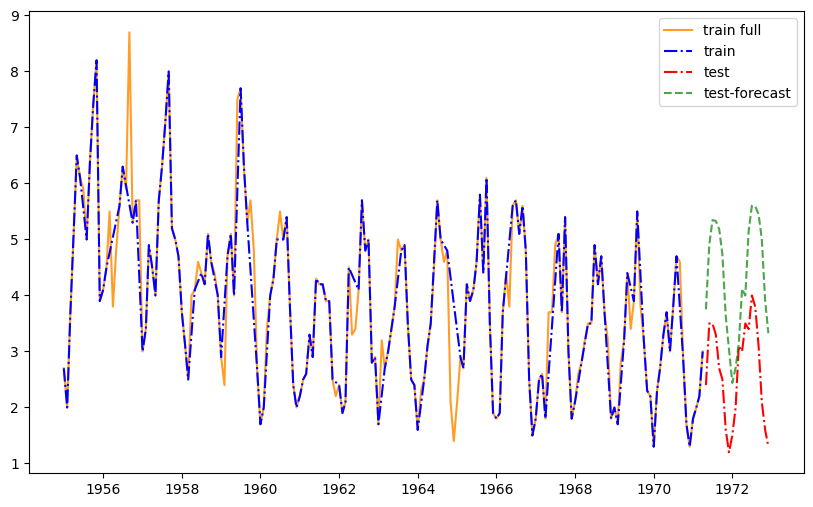

INFO:pyaf.timing:('OPERATION_START', ('SIGNAL_TRAINING', {'Signals': ['signal'], 'Transformations': [('signal', 'None', '_', 'T+S+R'), ('signal', 'None', 'Diff_', 'T+S+R'), ('signal', 'None', 'RelDiff_', 'T+S+R'), ('signal', 'None', 'CumSum_', 'T+S+R')], 'Cores': 4}))


 *** Resultados en el horizonte (Test) *** 
Forecast MAE : 1.664
Forecast MAPE : 73.868 %


------------------------------
Cantidad puntos remueve:  45
------------------------------


INFO:pyaf.timing:('OPERATION_END_ELAPSED', 4.955, ('SIGNAL_TRAINING', {'Signals': ['signal'], 'Transformations': [('signal', 'None', '_', 'T+S+R'), ('signal', 'None', 'Diff_', 'T+S+R'), ('signal', 'None', 'RelDiff_', 'T+S+R'), ('signal', 'None', 'CumSum_', 'T+S+R')], 'Cores': 4}))
INFO:pyaf.timing:('OPERATION_START', ('FINALIZE_TRAINING', {'Signals': ['signal'], 'Transformations': [('signal', [('signal', 'None', 'CumSum_', 'T+S+R'), ('signal', 'None', 'Diff_', 'T+S+R'), ('signal', 'None', 'RelDiff_', 'T+S+R'), ('signal', 'None', '_', 'T+S+R')])], 'Cores': 1}))
INFO:pyaf.timing:('OPERATION_START', ('MODEL_SELECTION', {'Signal': 'signal', 'Transformations': [('signal', 'None', 'CumSum_', 'T+S+R'), ('signal', 'None', 'Diff_', 'T+S+R'), ('signal', 'None', 'RelDiff_', 'T+S+R'), ('signal', 'None', '_', 'T+S+R')]}))
INFO:pyaf.timing:('OPERATION_END_ELAPSED', 0.005, ('MODEL_SELECTION', {'Signal': 'signal', 'Transformations': [('signal', 'None', 'CumSum_', 'T+S+R'), ('signal', 'None', 'Diff_', 

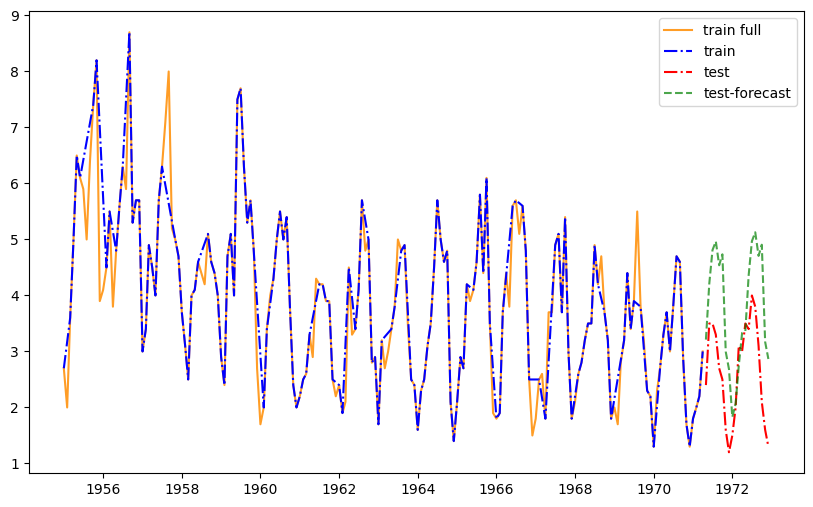

 *** Resultados en el horizonte (Test) *** 
Forecast MAE : 1.174
Forecast MAPE : 52.698 %


In [50]:
# Entrenar puntos variando la cantidad de datos de Train

# Determinar lista con cantidad de puntos a remover aleatoriamente
minp = 0
maxp = 50
pasop = 5
puntos_remueve= [i for i in range(minp,maxp,pasop)]


######################################
# Datos originales

ozone_csv = "https://raw.githubusercontent.com/antoinecarme/pyaf/master/data/ozone_exogenous_encoded.csv"
ozone = pd.read_csv(ozone_csv)
ozone['Date'] = ozone['Date'].astype(np.datetime64);

# Dar forma a los datos para solo seleccionar la fecha y la señal con el valor (Ozono)
ozone["date"] = ozone["Date"]
ozone["signal"] = ozone["Ozone"]

# Extraer informacion deseada en un nuevo dataframe
df = ozone[["date","signal"]].copy()

# Split Train-Test
puntos_test = 20
train_df_full =  df.iloc[:-puntos_test,:].copy()
######################################

for puntos in puntos_remueve:
    
    print('\n\n------------------------------')
    print('Cantidad puntos remueve: ',puntos)
    print('------------------------------')
    
    ##########################
    # Generacion de datos
    
    ozone_csv = "https://raw.githubusercontent.com/antoinecarme/pyaf/master/data/ozone_exogenous_encoded.csv"
    ozone = pd.read_csv(ozone_csv)
    ozone['Date'] = ozone['Date'].astype(np.datetime64);

    # Dar forma a los datos para solo seleccionar la fecha y la señal con el valor (Ozono)
    ozone["date"] = ozone["Date"]
    ozone["signal"] = ozone["Ozone"]

    # Extraer informacion deseada en un nuevo dataframe
    df = ozone[["date","signal"]].copy()
    
    ##########################
    # Split Train-Test
    
    train_df = df.iloc[:-puntos_test,:].copy()
    test_df = df.iloc[-puntos_test:,:].copy()
    
    ###################
    # Remover puntos aleatoriamente de Train
    
    train_df = train_df[~train_df.index.isin(train_df.sample(puntos).index)].copy()
    
    ###################
    # crear motor para deteccion de mejor modelo
    aforecast = autof.cForecastEngine()

    # Dias futuros de prediccion
    dias_predice = puntos_test

    # Determinar el mejor modelo - indicar columnas a usar
    aforecast.train(iInputDS = train_df, iTime = 'date', iSignal = 'signal', iHorizon = dias_predice)
    
    ###################
    # prediccion
    pred_df = aforecast.forecast(iInputDS=train_df, iHorizon=dias_predice)

    # Extraer los valores de forecasting, ya que devuelve train_df concatenado a la prediccion al final de la tabla
    pred_df = pred_df.tail(dias_predice)
    
    ###################
    # Visualizar prediccion

    plt.figure(figsize=(10,6))
    v1 = train_df.copy()
    v2 = test_df.copy()
    v3 = pred_df.copy()
    plt.plot(train_df_full['date'],train_df_full['signal'],'-',color='darkorange',alpha=0.85,label='train full')
    plt.plot(v1['date'],v1['signal'],'-.b',label='train')
    plt.plot(v2['date'],v2['signal'],'-.r',label='test')
    plt.plot(v3['date'],v3['signal_Forecast'],'--g',label='test-forecast',alpha=0.7)
    plt.legend()
    plt.show()
    
    ###################
    # Evaluar el rendimiento del modelo

    # MAE: Valor de error absoluto promedio
    def mae(y_hat, y_true):
        return np.mean(np.abs(y_hat-y_true))

    # MAPE: Valor de error porcentual absoluto promedio
    def mape(y_hat, y_true):
        return np.mean(np.abs(100.*(y_hat-y_true)/(y_true + 1e-5)))

    print(' *** Resultados en el horizonte (Test) *** ')
    print('Forecast MAE : %0.3f' % mae(v3["signal_Forecast"].values, v2["signal"].values))
    print('Forecast MAPE : %0.3f' % mape(v3["signal_Forecast"].values, v2["signal"].values),'%')

Se observa que cuando se remueven datos de forma aleatoria de Train, el rendimiento del modelo en general es más caotico, produciendo en algunos casos mejoras y en otros lo opuesto. Lo que quiere decir es que el modelo es susceptible a dicha falta de datos, puesto que el aprendizaje de los parametros es diferente según la posición del dato faltante.